# OUR GROUP - ITI_Mansoura
 
- **Nada Abd_alftah Abd_alhamed**
  - Email: [nadaalswah2001@gmail.com](mailto:nadaalswah2001@gmail.com)
- **Ashraf Mahmoud Abdelzaher**
  - Email: [Ashrafmahmoudd99@gmail.com](mailto:Ashrafmahmoudd99@gmail.com)
- **Shorouq Hossam Mohammed**
  - Email: [shorouq.hossam.mohammed01@gmail.com](mailto:shorouq.hossam.mohammed01@gmail.com)

## Classical Clustering

- determine the number of clusters
- randomly initialize the centroids
- measure distances between data points and the centroids >> Fidelity
- assign data points to the nearest centroid
- update the position of the centroid according to the mean of each cluster

## Quantum Clustering

- determine the number of clusters
- randomly initialize the centroids
- measure distances between data points and the centroids >> Fidelity
  - Initialize three separable states in the ground state. One is for the data point and the other two represent the centroid.
  - choose your encoding scheme
  - using a for loop you will pick a classical point to measure the distance between the centroids and this sample.
  - encode the data using the encoding scheme (rotational gates)
  - apply the selected rotational gates on the states
  - then calculate the fidelity between the two states (one state would represent the data point and the other would represent the centroid
- assign data points to the nearest centroid
- update the position of the centroid according to the mean of each cluster

## TASK!

Implement a quantum clustering algorithm using the above steps to cluster a dataset of your own choice.
- *I would prefer two clusters only but do as you wish.*
- Use Numpy only.
- Before each cell I want a small description of what is happening.
- Write your code in functions.
- Each function should execute one operation only.
- Annotate your code and document it.


# Import Libraries

In [384]:
import numpy as np
from qiskit.circuit.library import  RYGate
import matplotlib.pylab as plt


# Initialize simple Data

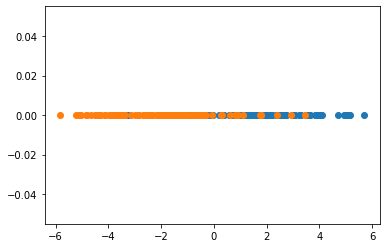

In [385]:
np.random.seed(42)
x1 = np.random.normal(2, 2, 100)
y1 = np.ones(len(x1))

x2 = np.random.normal(-2, 2, 100)
y2 = np.zeros(len(x2))

plt.scatter(x1, y2)
plt.scatter(x2, y2)

In [386]:
# Staking the data
data_set = np.vstack((np.hstack((x1, x2)), np.hstack((y1, y2)))).T
data_set.shape

(200, 2)

In [387]:
# Check dataset 
data_set

array([[ 2.99342831,  1.        ],
       [ 1.7234714 ,  1.        ],
       [ 3.29537708,  1.        ],
       [ 5.04605971,  1.        ],
       [ 1.53169325,  1.        ],
       [ 1.53172609,  1.        ],
       [ 5.15842563,  1.        ],
       [ 3.53486946,  1.        ],
       [ 1.06105123,  1.        ],
       [ 3.08512009,  1.        ],
       [ 1.07316461,  1.        ],
       [ 1.06854049,  1.        ],
       [ 2.48392454,  1.        ],
       [-1.82656049,  1.        ],
       [-1.44983567,  1.        ],
       [ 0.87542494,  1.        ],
       [-0.02566224,  1.        ],
       [ 2.62849467,  1.        ],
       [ 0.18395185,  1.        ],
       [-0.8246074 ,  1.        ],
       [ 4.93129754,  1.        ],
       [ 1.5484474 ,  1.        ],
       [ 2.13505641,  1.        ],
       [-0.84949637,  1.        ],
       [ 0.91123455,  1.        ],
       [ 2.22184518,  1.        ],
       [-0.30198715,  1.        ],
       [ 2.75139604,  1.        ],
       [ 0.79872262,

# Implementation 

## 1.initialize_centroids
- **Explanation**: 

   - The `init_state` function initializes the state vector.
   - It returns a 2D numpy array representing the initial state vector with shape (2, 1), where the first element is 1 and the second element is 0.
   - The function is annotated with the expected type of the return value using `-> np.ndarray`.
   - The docstring provides information about the purpose of the function and the format of its output.

In [388]:
def init_state() -> np.ndarray:
    """
    Initialize the state vector.
 
    Returns:
    np.ndarray: A 2D numpy array representing the initial state vector with shape (2, 1).
    """
    zero_vector = np.array([[1], [0]])
    return zero_vector
  

In [389]:
init_state()

array([[1],
       [0]])

## 2.Data Encoding :
 

- **Explanation**: 
  - This function encodes each data point into a quantum state using rotation gates (`RYGate`). 
  - It iterates over each data point, applies the rotation gate to the ground state, and stores the resulting state. 
  - Finally, it reshapes the list of states into a 2D array and returns it.

In [403]:
def encode_data(points: np.array) -> np.array:
    """
    Encode data points into quantum states using rotation gates.
 
    Parameters:
    -----------
    points : np.array
        Array of data points to be encoded. Shape: (N,)
 
    Returns:
    --------
    evolved_states : np.array
        Encoded quantum states. Shape: (N, 2)
    """
    ground_state = init_state()  # Shape: (2, 1)
    evolved_states = []
    for data_point in points:  # Shape: (1,)
        ry = RYGate(float(data_point)).to_matrix()  # Shape: (2, 2)
        evolved_state = ry @ ground_state  # Shape: (2, 1)
        evolved_states.append(evolved_state)
 
    # Reshape the list of states into a 2D array
    evolved_states = np.array(evolved_states).reshape((-1, 2))  # Shape: (N, 2)
    return evolved_states

## 3.Initialize Random Centroids:
- **Explanation:**
   - This function initializes centroids randomly by selecting random data points from the input data.
   - It iterates K times, randomly selects a data point from data, and assigns it as a centroid.
   - Finally, it returns the array of initialized centroids


In [404]:
def init_random_centroids(data: np.array, K: int) -> np.array:
    """
    Initialize centroids randomly by selecting random data points.
 
    Parameters:
    -----------
    data : np.array
        Array of data points from which centroids will be chosen. Shape: (N, 1)
    K : int
        Number of centroids to initialize.
 
    Returns:
    --------
    centroids : np.array
        Array of initialized centroids. Shape: (K, 1)
    """
    centroids = np.zeros((K, 1))
    for i in range(K):
        centroid = data[np.random.choice(range(len(data)))]
        centroids[i] = centroid
    return centroids
    
    

## 4.Calculate Fidelity:


- **Explanation:**
    - The `calculate_fidelity` function computes the fidelity between two quantum states represented by vectors.
    - It takes two numpy arrays `vec_1` and `vec_2` as input parameters, each representing a quantum state vector.
    - The function returns the fidelity between the two quantum states as a scalar value.
    - The input parameters are annotated with their expected types using `vec_1: np.ndarray` and `vec_2: np.ndarray`.
    - The output is annotated as `-> float`, indicating that the function returns a floating-point value.
    - The docstring provides information about the purpose of the function, the expected types of its inputs, and the format of its output.

In [405]:
def calculate_fidelity(vec_1: np.ndarray, vec_2: np.ndarray) -> float:
    """
    Calculate the fidelity between two quantum states.
 
    Args:
    vec_1 (np.ndarray): First quantum state vector.
    vec_2 (np.ndarray): Second quantum state vector.
 
    Returns:
    float: The fidelity between the two input quantum states, represented as a scalar value.
    """
    fidelity = np.vdot(vec_1, vec_2)
    return fidelity 
  

## 5.Find Closest Centroids:
 

- **Explanation**:

    - The function `find_closest_centroids` calculates the centroid memberships for each example in the encoded data.
    - The input parameters `encoded_data` and `encoded_centers` are annotated with their expected types, and the output is annotated as a numpy array.
    - The function iterates through each data point and calculates the fidelity with each cluster center, storing the results in a list.
    - The index of the cluster with maximum fidelity for each data point is determined and stored in the `idx` list.
    - Finally, the list of indices is converted into a numpy array and returned as the output.

In [406]:
    
def find_closest_centroids(encoded_data: np.ndarray, encoded_centers: np.ndarray) -> np.ndarray:
    """
    Computes the centroid memberships for every example and returns the cluster index.
 
    Args:
    encoded_data (np.ndarray): Encoded data points with shape (num_examples, num_features).
    encoded_centers (np.ndarray): Encoded cluster centers with shape (num_clusters, num_features).
 
    Returns:
    np.ndarray: An array containing the index of the closest centroid for each data point.
    """
    #print("Shape of input encoded_data:", encoded_data.shape)
    #print("Shape of input encoded_centers:", encoded_centers.shape)
 
    idx = []
    fidelities = []
    for encoded_data_point in encoded_data:
        fidelity_for_centroid = []
        for cent in range(len(encoded_centers)):
            center = encoded_centers[cent].reshape(encoded_data_point.shape)
            fidelity_for_centroid.append(calculate_fidelity(encoded_data_point, center))
        fidelities.append(fidelity_for_centroid)
 
    for fidelity_for_centroid in fidelities:
        idx.append(fidelity_for_centroid.index(max(fidelity_for_centroid)))
 
    idx = np.array(idx)
 
    #print("Shape of output idx:", idx.shape)
 
    return idx

## 6.Updating Centroids:
 

- **Explanation**:
    - This function updates the centroids based on the mean of the data points assigned to each centroid.
    - It iterates over each centroid index `i`, retrieves the data points belonging to the cluster `i`, calculates the mean of these data points along axis 0 (columns), and assigns the mean as the new centroid.
    - Finally, it returns the array of updated centroids

In [407]:
def updating_centroids(encoded_data:np.array, idx:np.array, K:int)->np.array:
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.
    """
    centroids = np.zeros((K, 2), dtype=complex)
    for i in range(K):
        cluster_data = encoded_data[idx == i]
        centroid_mean = np.mean(cluster_data) 
        centroids[i] = centroid_mean
   
    return centroids

## 7.Quantum Kmeans:
 

- **Explanation**:
  - The `quantum_kmeans` function integrates the functionality of `init_random_centroids`, `encode_data`, `find_closest_centroids`, and `updating_centroids` functions directly into the k-means algorithm for simplicity.
  - It iterates over the data points, calculates the closest centroids, updates centroids, and checks for convergence until the maximum number of iterations is reached or convergence is achieved.
  - The final centroids and indices of the closest centroids for each data point are returned.

In [412]:
def quantum_kmeans(data: np.array, K: int, max_iters=200) -> [np.array, np.array]:
    """
    Implements the quantum k-means clustering algorithm to partition data points into K clusters.
 
    Parameters:
    -----------
    data : np.array
        Array of data points to be clustered. Shape: (N, 1)
    K : int
        Number of clusters.
    max_iters : int, optional
        Maximum number of iterations for the k-means algorithm. Default is 200.
 
    Returns:
    --------
    updated_centroids : np.array
        Final centroids of the clusters. Shape: (K, 2)
    idx : np.array
        Cluster indices corresponding to the closest centroids for each data point. Shape: (N,)
    """
    centroids = init_random_centroids(data, K)  # Initialize centroids randomly
    encoded_data = encode_data(data)  # Encode data points into quantum states
    encoded_centers = encode_data(centroids)  # Encode centroids into quantum states
 
    for i in range(max_iters):
        print("Iteration number:", i + 1)
        idx = find_closest_centroids(encoded_data, encoded_centers)  # Find closest centroids
        updated_centroids = updating_centroids(encoded_data, idx, K)  # Update centroids
        print(updated_centroids)
        print("------------------------------------------------------")
        # Check for convergence
        diff = updated_centroids - encoded_centers
        if not diff.any():
            break
        encoded_centers = updated_centroids
 
    return updated_centroids, idx



## 8.Prediction:
 

- **Explanation**:
  - This function predicts the closest centroid for each new data point.
  - It first encodes the new data points using the `encode_data` function.
  - Then, it finds the closest centroids for each encoded data point using the `find_closest_centroids` function.
  - Finally, it returns the array of cluster indices corresponding to the closest centroids for each new data point. 

In [413]:
def predict(new_data: np.array, final_centroids: np.array) -> np.array:
    """
    Predicts the closest centroid for each new data point.
 
    Parameters:
    -----------
    new_data : np.array
        New data points to be assigned to centroids. Shape: (N, 1)
    final_centroids : np.array
        Final centroids of the clusters. Shape: (K, 2)
 
    Returns:
    --------
    idx : np.array
        Cluster indices corresponding to the closest centroids for each new data point. Shape: (N,)
    """
    # Encode the new data points
    encoded_new_data = encode_data(new_data)
    # Find closest centroids for each new data point
    idx = find_closest_centroids(encoded_new_data, final_centroids)
    return idx


# Quantum Kmeans on Our Data

- This code prepares feature data for further analysis or modeling by extracting and reshaping it into a format suitable for various algorithms.

In [414]:
data= data_set[:, 0] 

print(data.shape)#200,1

(200,)


- Appling the quantum k-means function with the following parameters:
 
    - `data`: Input data points to be clustered.
    - `K`: Number of clusters desired, set to 2 in this case.
    - `max_iters`: Maximum number of iterations for the k-means algorithm, set to 10.

In [415]:
K = 2
final_centroids, idx = quantum_kmeans(data, K, max_iters=10)

Iteration number: 1

[[ 0.5127496+0.j  0.5127496+0.j]

 [-0.2864649+0.j -0.2864649+0.j]]

------------------------------------------------------

Iteration number: 2

[[ 0.47373589+0.j  0.47373589+0.j]

 [-0.39878288+0.j -0.39878288+0.j]]

------------------------------------------------------

Iteration number: 3

[[ 0.47373589+0.j  0.47373589+0.j]

 [-0.39878288+0.j -0.39878288+0.j]]

------------------------------------------------------


- Prediction
predict which cluster a new data point belongs to based on the centroids obtained from the k-means clustering algorithm.

In [416]:
new_data=[1]
cluster=predict(new_data,final_centroids)
print(f"new_data={new_data}")
print("cluster for new data point :",cluster)

new_data=[1]

cluster for new data point : [0]
